### Importing libraries

In [1]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torchvision import datasets, transforms
import matplotlib.pyplot as plt
from torchsummary import summary

from models.model_1 import Net_1

### Data transforms

In [2]:
train_transforms = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.1307,), (0.3081,))
])

test_transforms = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.1307,), (0.3081,))
])

### Loading Dataset

In [3]:
train = datasets.MNIST('../data', train=True, download=True, transform=train_transforms)
test = datasets.MNIST('../data', train=False, download=True, transform=test_transforms)

### Data statistics

In [4]:
train_data = train.train_data.numpy()
train_data = train.transform(train_data)
torch.min(train_data), torch.max(train_data), torch.mean(train_data), torch.std(train_data)

c:\Users\focusedmonk\anaconda3\envs\torch\lib\site-packages\torchvision\datasets\mnist.py:75: UserWarning: train_data has been renamed data
  warnings.warn("train_data has been renamed data")


(tensor(-0.4242), tensor(2.8215), tensor(-0.0001), tensor(1.0000))

### Data loader

In [5]:
seed = 1
cuda = torch.cuda.is_available()
device = 'cuda' if cuda else 'cpu'
torch.manual_seed(seed)
torch.cuda.manual_seed(seed)

dataloader_cfgs = dict(batch_size=1024, shuffle=True, num_workers=4, pin_memory=True) if cuda else dict(batch_size=128, shuffle=True)

# train & test dataloaders
train_loader = torch.utils.data.DataLoader(train, **dataloader_cfgs)
test_loader = torch.utils.data.DataLoader(test, **dataloader_cfgs)

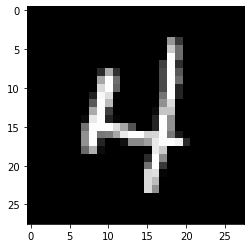

In [6]:
img, lbl = next(iter(train_loader))
plt.imshow(img[0].numpy().squeeze(), cmap='gray')

### Model 1 architecture

In [7]:
model_1 = Net_1().to(device)
summary(model_1, input_size=(1, 28, 28))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 32, 28, 28]             320
            Conv2d-2           [-1, 64, 28, 28]          18,496
         MaxPool2d-3           [-1, 64, 14, 14]               0
            Conv2d-4          [-1, 128, 14, 14]          73,856
            Conv2d-5          [-1, 256, 14, 14]         295,168
         MaxPool2d-6            [-1, 256, 7, 7]               0
            Conv2d-7            [-1, 512, 5, 5]       1,180,160
            Conv2d-8           [-1, 1024, 3, 3]       4,719,616
            Conv2d-9             [-1, 10, 1, 1]          92,170
Total params: 6,379,786
Trainable params: 6,379,786
Non-trainable params: 0
----------------------------------------------------------------
Input size (MB): 0.00
Forward/backward pass size (MB): 1.51
Params size (MB): 24.34
Estimated Total Size (MB): 25.85
-------------------------------------

### Model training and experiments

In [8]:
num_epochs = 20
criterion = F.nll_loss
optimizer = optim.SGD(model_1.parameters(), lr=0.01, momentum=0.9)

for epoch in range(1, num_epochs+1):
    print('EPOCH:', epoch)
    model_1.model_train(device, train_loader, criterion, optimizer)
    model_1.model_test(device, test_loader, criterion)  

EPOCH: 1


Train: Loss=2.0471372604370117 Batch_id=58 Accuracy=43.11: 100%|██████████| 59/59 [00:33<00:00,  1.76it/s]



Test set: Average loss: 2.1241, Accuracy: 4328/10000 (43.28%), Accuracy Diff: 0.173333333333332

EPOCH: 2


Train: Loss=0.6600562930107117 Batch_id=58 Accuracy=61.00: 100%|██████████| 59/59 [00:25<00:00,  2.35it/s]



Test set: Average loss: 0.5464, Accuracy: 8408/10000 (84.08%), Accuracy Diff: 23.08

EPOCH: 3


Train: Loss=0.19540175795555115 Batch_id=58 Accuracy=91.12: 100%|██████████| 59/59 [00:23<00:00,  2.51it/s]



Test set: Average loss: 0.1660, Accuracy: 9498/10000 (94.98%), Accuracy Diff: 3.856666666666669

EPOCH: 4


Train: Loss=0.14110641181468964 Batch_id=58 Accuracy=95.50: 100%|██████████| 59/59 [00:25<00:00,  2.27it/s]



Test set: Average loss: 0.1089, Accuracy: 9641/10000 (96.41%), Accuracy Diff: 0.9099999999999966

EPOCH: 5


  0%|          | 0/59 [00:10<?, ?it/s]


KeyboardInterrupt: 

In [ ]:
len(model_1.train_accuracy)
model_1.train_accuracy, model_1.test_accuracy

([87.61, 98.33166666666666], [98.13, 98.38])

In [ ]:
model_1.train_accuracy[-1] - model_1.test_accuracy[-1]

-0.04833333333333201